In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='darkgrid')

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from xgboost import XGBRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
! unzip /content/archive.zip


In [ ]:
df_test=pd.read_csv("/content/test.csv")
df_train=pd.read_csv("/content/train.csv")
print("Train shape:",df_train.shape)
print("Test Shape:",df_test.shape)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X_trainfull=df_train.drop(["SalePrice"], axis=1)
y=df_train.SalePrice

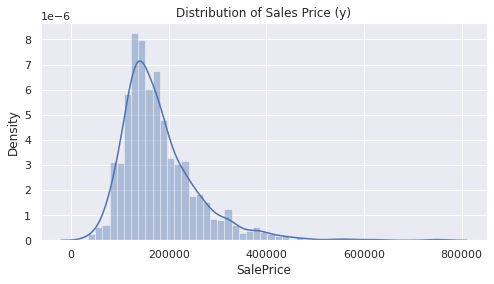

In [ ]:
plt.figure(figsize=(8,4))
plt.title("Distribution of Sales Price (y)")
sns.distplot(y)
plt.show()

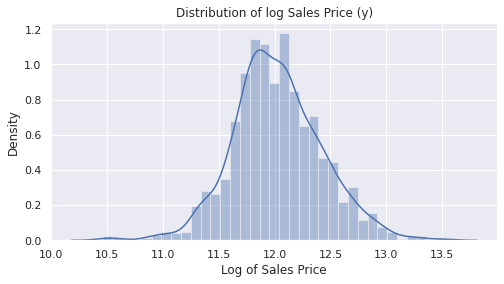

In [ ]:
y=np.log1p(y)

plt.figure(figsize=(8,4))
plt.title("Distribution of log Sales Price (y)")
sns.distplot(y)
plt.xlabel("Log of Sales Price")
plt.show()

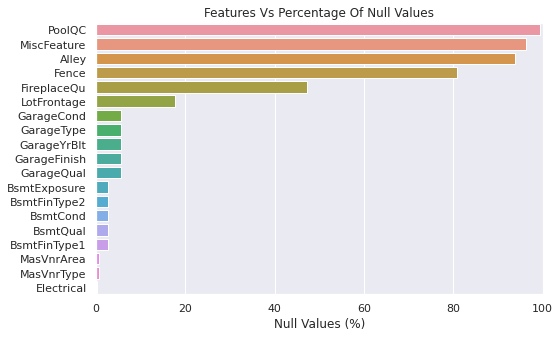

In [ ]:
d_temp=X_trainfull.isna().sum().sort_values(ascending=False)
d_temp=d_temp[d_temp>0]
d_temp=d_temp/df_train.shape[0]*100

plt.figure(figsize=(8,5))
plt.title("Features Vs Percentage Of Null Values")
sns.barplot(y=d_temp.index,x=d_temp, orient='h')
plt.xlim(0,100)
plt.xlabel("Null Values (%)")
plt.show()

In [ ]:
na_index=(d_temp[d_temp>20]).index
X_trainfull.drop(na_index, axis=1, inplace=True)

Drop na>20% fields

In [ ]:
num_cols=X_trainfull.corrwith(y).abs().sort_values(ascending=False).index
X_num=X_trainfull[num_cols]
X_cat=X_trainfull.drop(num_cols,axis=1)

In [ ]:
X_num.sample(5)

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,GarageYrBlt,TotRmsAbvGrd,Fireplaces,MasVnrArea,BsmtFinSF1,LotFrontage,WoodDeckSF,OpenPorchSF,2ndFlrSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,EnclosedPorch,KitchenAbvGr,ScreenPorch,MSSubClass,PoolArea,MoSold,3SsnPorch,LowQualFinSF,YrSold,OverallCond,MiscVal,Id,BsmtHalfBath,BsmtFinSF2
349,9,2728,3,706,1848,1848,2,2005,2006,2006.0,10,2,870.0,1410,56.0,0,0,880,1,20431,1,438,4,0,1,0,60,0,4,0,0,2006,5,0,350,0,0
451,7,1533,2,576,1533,1533,2,1975,1975,1975.0,5,2,0.0,655,62.0,200,54,0,0,70761,1,878,2,0,1,0,20,0,12,0,0,2006,5,0,452,0,0
617,6,832,2,528,832,832,1,1954,1954,1962.0,4,0,0.0,0,59.0,0,0,0,0,7227,0,832,2,0,1,0,45,0,6,0,0,2008,6,0,618,0,0
1459,5,1256,1,276,1256,1256,1,1965,1965,1965.0,6,0,0.0,830,75.0,736,68,0,1,9937,1,136,3,0,1,0,20,0,6,0,0,2008,6,0,1460,0,290
1211,8,1752,2,492,559,1080,2,1988,2005,1988.0,8,0,0.0,427,152.0,325,12,672,0,12134,0,132,4,0,1,0,50,0,6,0,0,2010,7,0,1212,0,0


In [ ]:
high_corr_num=X_num.corrwith(y)[X_num.corrwith(y).abs()>0.5].index
X_num=X_num[high_corr_num]

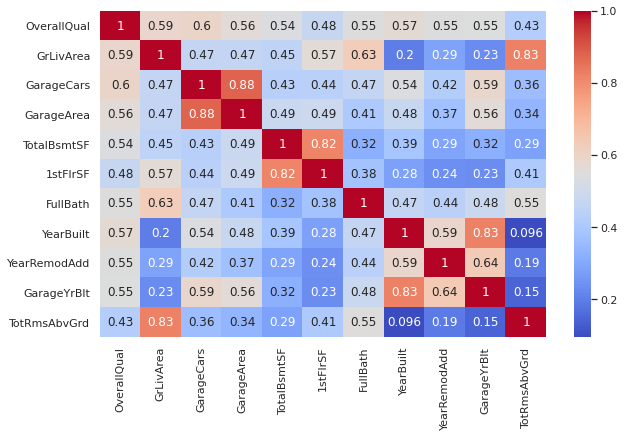

Correlation of Each feature with target


OverallQual     0.817185
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
GarageYrBlt     0.541073
TotRmsAbvGrd    0.534422
dtype: float64

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(X_num.corr(), annot=True, cmap='coolwarm')
plt.show()

print("Correlation of Each feature with target")
X_num.corrwith(y)

In [ ]:
X_num=X_num[high_corr_num]
X_num.drop(['TotRmsAbvGrd','GarageArea','1stFlrSF','GarageYrBlt'],axis=1, inplace=True)

In [ ]:
#function to handle NA
def handle_na(df, func):
    """
    Input dataframe and function 
    Returns dataframe after filling NA values
    eg: df=handle_na(df, 'mean')
    """
    na_cols=df.columns[df.isna().sum()>0]
    for col in na_cols:
        if func=='mean':
            df[col]=df[col].fillna(df[col].mean())
        if func=='mode':
            df[col]=df[col].fillna(df[col].mode()[0])
    return df

In [ ]:
X_num=handle_na(X_num, 'mean')

In [ ]:
# Function to scale df 
def scale_df(df):
    """
    Input: data frame
    Output: Returns minmax scaled Dataframe 
    eg: df=scale_df(df)
    """
    scaler=MinMaxScaler()
    for col in df.columns:
        df[col]=scaler.fit_transform(np.array(df[col]).reshape(-1,1))
    return df

In [ ]:
X_num=scale_df(X_num)

In [ ]:
X_train, X_val, y_train, y_val=train_test_split(X_num,y, test_size=0.2)
model=LinearRegression()
model.fit(X_train,y_train)
print(f"Train score : {model.score(X_train,y_train)}")
print(f"Validation score : {model.score(X_val,y_val)}")

Train score : 0.8043759872278324
Validation score : 0.8622259515022632


In [ ]:
model=SVR()
model.fit(X_train,y_train)
print(f"Train score : {model.score(X_train,y_train)}")
print(f"Validation score : {model.score(X_val,y_val)}")

Train score : 0.8683758283642626
Validation score : 0.8543468142737698


In [ ]:
model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
print(f"Train score : {model.score(X_train,y_train)}")
print(f"Validation score : {model.score(X_val,y_val)}")

Train score : 0.9761530441151937
Validation score : 0.8185248117814089


In [ ]:
model=XGBRegressor(learning_rate=0.1)
model.fit(X_train,y_train)
print(f"Train score : {model.score(X_train,y_train)}")
print(f"Validation score : {model.score(X_val,y_val)}")

[21:37:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score : 0.9021813337853462
Validation score : 0.8050041446669036


In [ ]:
num_features=X_num.columns

# CATEGORICAL DATA FEATURE SELECTION AND ENGINEERING

In [ ]:
X_cat.sample(5)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
298,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,Mansard,CompShg,HdBoard,AsphShn,BrkFace,Gd,TA,CBlock,TA,TA,No,ALQ,Rec,GasA,Gd,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
592,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,Gd,PConc,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Detchd,Fin,TA,TA,Y,WD,Normal
1358,FV,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,Twnhs,2Story,Gable,CompShg,MetalSd,MetalSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Normal
812,C (all),Grvl,Reg,Bnk,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,None,Fa,TA,CBlock,TA,TA,Av,Unf,Unf,GasA,TA,N,FuseA,Fa,Typ,Basment,Unf,TA,TA,N,WD,Alloca
826,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,TA,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,NaN,NaN,NaN,NaN,Y,WD,Normal


In [ ]:
X_cat.describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,1379,1379,1379,1379,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,870,605,1311,1326,1340,1267,1198


In [ ]:
for feature in X_cat.columns:
    print(
        f"{feature} :{len(X_cat[feature].unique())}: {X_cat[feature].unique()}"
    )

MSZoning :5: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street :2: ['Pave' 'Grvl']
LotShape :4: ['Reg' 'IR1' 'IR2' 'IR3']
LandContour :4: ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities :2: ['AllPub' 'NoSeWa']
LotConfig :5: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope :3: ['Gtl' 'Mod' 'Sev']
Neighborhood :25: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 :9: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 :8: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType :5: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle :8: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle :6: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl :8: ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
E

In [ ]:
cat_na=X_cat.isna().sum().sort_values(ascending=False)
cat_na=cat_na[cat_na>30]
X_cat.drop(cat_na.index, axis=1, inplace=True)

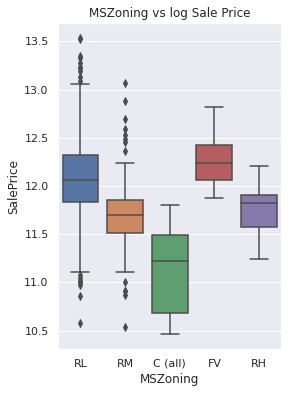

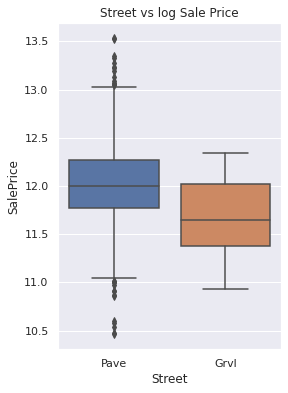

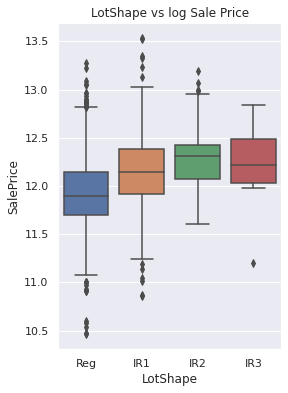

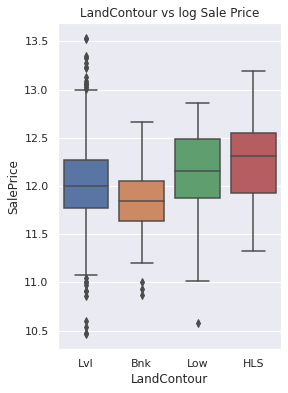

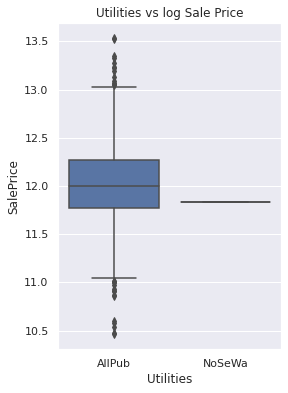

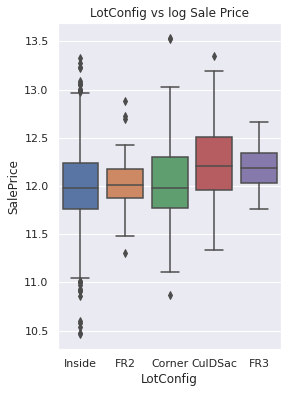

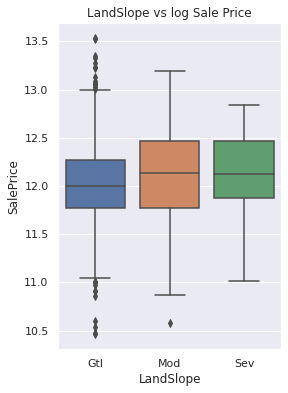

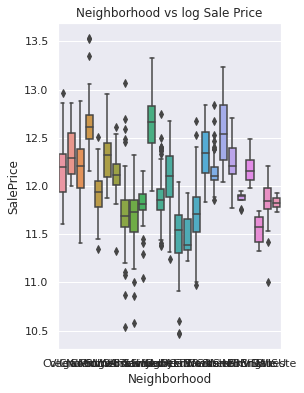

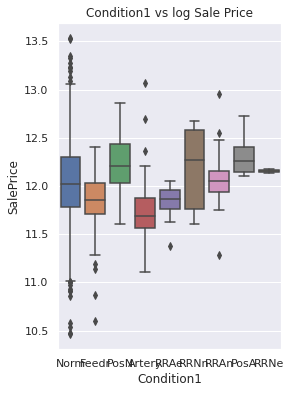

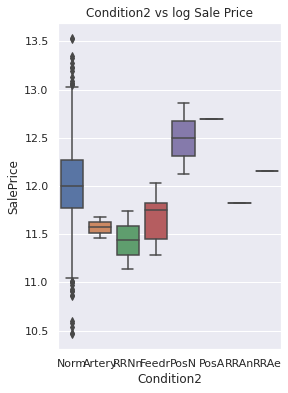

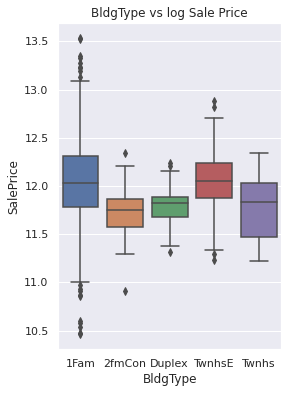

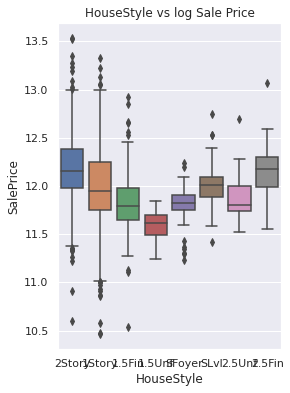

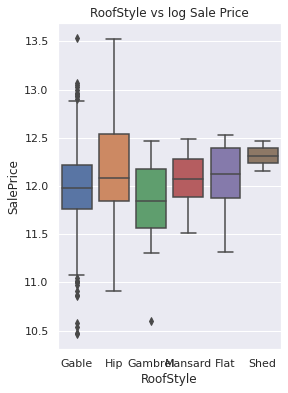

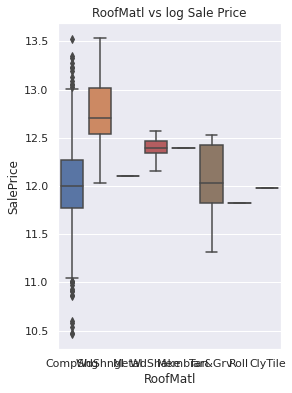

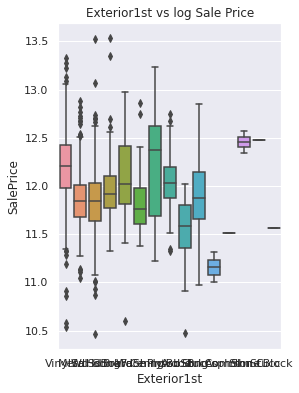

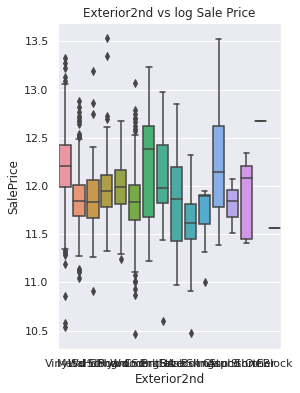

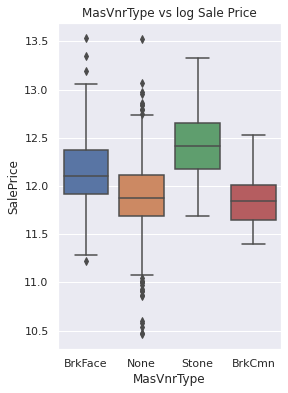

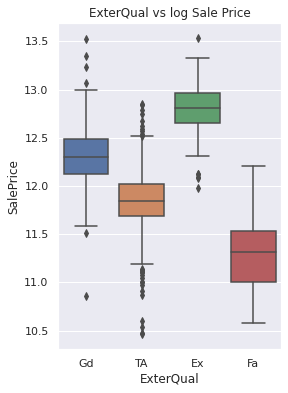

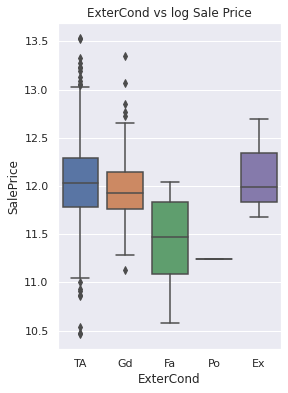

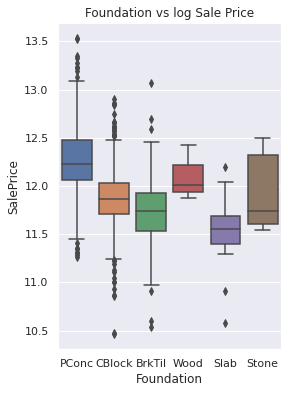

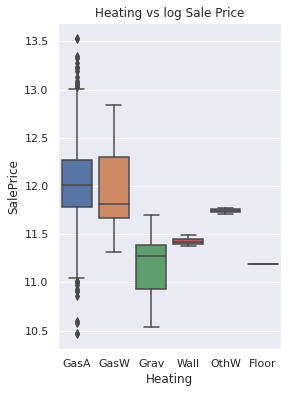

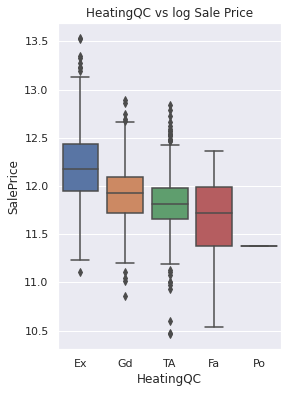

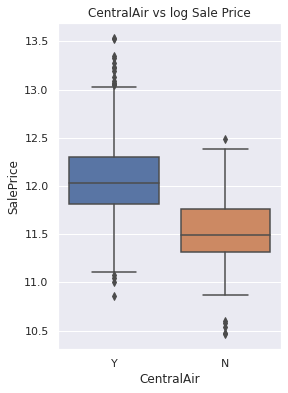

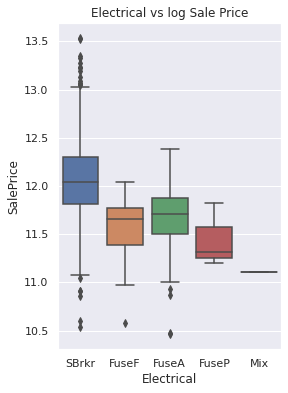

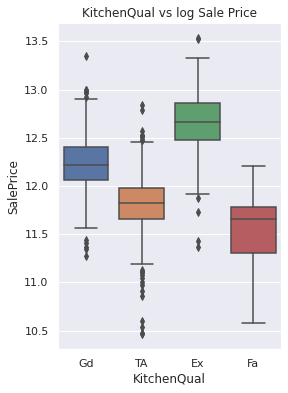

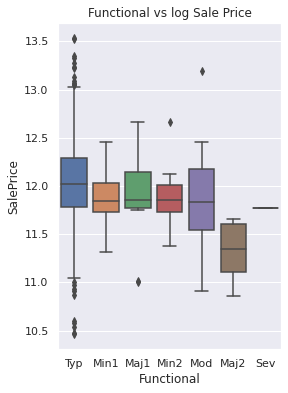

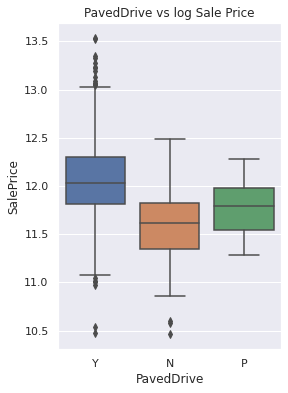

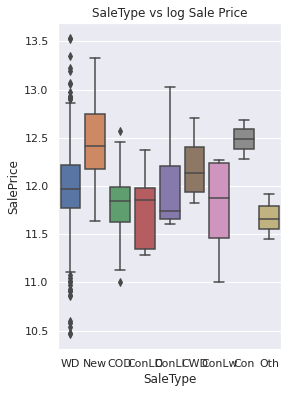

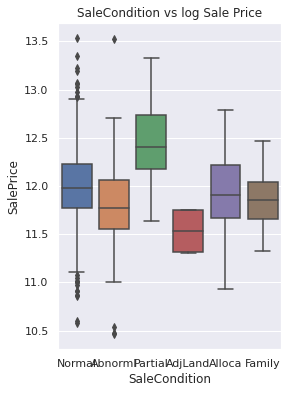

In [ ]:
for feature in X_cat.columns:
    plt.figure(figsize=(4,6))
    plt.title(f"{str(feature)} vs log Sale Price")
    sns.boxplot(X_cat[feature],y)
    plt.show()

In [ ]:
X_cat=handle_na(X_cat, 'mode')

In [ ]:
le=LabelEncoder()
X_cat_le=pd.DataFrame()
for col in X_cat.columns:
    X_cat_le[col] = le.fit_transform(X_cat[col])

In [ ]:
Xc_train, Xc_test, yc_train,yc_test=train_test_split(X_cat_le,y, test_size=0.2)

In [ ]:
model=RandomForestRegressor()
model.fit(Xc_train,yc_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
print(f"Train score : {model.score(Xc_train,yc_train)}")
print(f"Test score : {model.score(Xc_test,yc_test)}")

Train score : 0.950789845222583
Test score : 0.7008606795689274


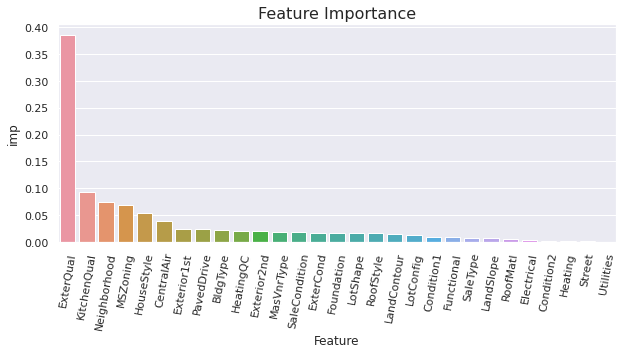

In [ ]:
feat_imp=pd.DataFrame({"Feature":Xc_train.columns,"imp":model.feature_importances_})
feat_imp=feat_imp.sort_values('imp', ascending=False)

plt.figure(figsize=(10,4))
plt.title("Feature Importance", fontsize=16)
sns.barplot('Feature', 'imp', data=feat_imp)
plt.xticks(rotation=80)
plt.show()

In [ ]:
feat=[]
score_train=[]
score_test=[]
for i in range(29):
    imp_ft=feat_imp.head(i+1).Feature.unique()

    X_cat_imp=pd.DataFrame()
    for col in imp_ft:
        X_cat_imp[col] = le.fit_transform(X_cat[col])

    Xc_train, Xc_test, yc_train,yc_test=train_test_split(X_cat_imp,y, test_size=0.2)

    model=RandomForestRegressor(n_estimators=100)
    model.fit(Xc_train,yc_train)
    feat.append(i+1)
    score_train.append(model.score(Xc_train,yc_train))
    score_test.append(model.score(Xc_test,yc_test))
    
acc_feat_df=pd.DataFrame({"Feature":feat,"TrainAcc":score_train,"ValAcc":score_test})

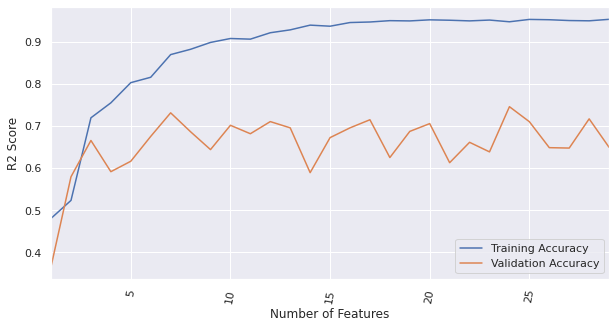

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot('Feature', 'TrainAcc', data=acc_feat_df, label="Training Accuracy")
sns.lineplot('Feature', 'ValAcc', data=acc_feat_df, label="Validation Accuracy")
plt.xlabel("Number of Features")
plt.ylabel("R2 Score")
plt.xticks(rotation=80)
plt.xlim(1,29)
plt.show()

In [ ]:
cat_features=list(feat_imp.iloc[:17,0])

In [ ]:
# Selecting only important features
X_cat=X_cat[cat_features]
# OHE features
X_cat=pd.get_dummies(X_cat)
# Scaling the data
X_cat=scale_df(X_cat)

In [ ]:
X_train, X_val, y_train, y_val=train_test_split(X_cat,y, test_size=0.2)

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)
print(f"Train score : {model.score(X_train,y_train)}")
print(f"Validation score : {model.score(X_val,y_val)}")

Train score : 0.8001158624841852
Validation score : -3.683646842403529e+22


In [ ]:
model=SVR()
model.fit(X_train,y_train)
print(f"Train score : {model.score(X_train,y_train)}")
print(f"Validation score : {model.score(X_val,y_val)}")

Train score : 0.9164141395943066
Validation score : 0.7512742163386245


In [ ]:
model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
print(f"Train score : {model.score(X_train,y_train)}")
print(f"Validation score : {model.score(X_val,y_val)}")

Train score : 0.954725079507124
Validation score : 0.7074112516970278


In [ ]:
model=XGBRegressor(learning_rate=0.1)
model.fit(X_train,y_train)
print(f"Train score : {model.score(X_train,y_train)}")
print(f"Validation score : {model.score(X_val,y_val)}")

Train score : 0.9042146806102414
Validation score : 0.7344513702287531


In [ ]:
#Combine train and test data
Xtt=pd.concat([X_trainfull,df_test])

#Split into Numeric and categoric features
Xtt_num= Xtt[num_features]
Xtt_cat= Xtt[cat_features]

#Handling null values
Xtt_cat=handle_na(Xtt_cat, 'mode')
Xtt_num=handle_na(Xtt_num,'mean')

#OHE Categoric features
Xtt_cat=pd.get_dummies(Xtt_cat,drop_first=True)

#Combine Numeric and Categorical features
Xtt=pd.concat([Xtt_num,Xtt_cat], axis=1)

#Scale Features
Xtt=scale_df(Xtt)

#Training and Testing Features after Feature Engineering
X=Xtt.iloc[:df_train.shape[0],:]
X_test=Xtt.iloc[df_train.shape[0]:,:]

#Training and Validation features and target
X_train, X_val, y_train, y_val=train_test_split(X,y, test_size=0.2)

In [ ]:
model_LR=LinearRegression()
model_LR.fit(X_train,y_train)
print(f"Train score : {model_LR.score(X_train,y_train)}")
print(f"Validation score : {model_LR.score(X_val,y_val)}")
yv_LR=model_LR.predict(X_val)
yt_LR=model_LR.predict(X_test)

In [ ]:
model_SV=SVR()
model_SV.fit(X_train,y_train)
print(f"Train score : {model_SV.score(X_train,y_train)}")
print(f"Validation score : {model_SV.score(X_val,y_val)}")
yv_SVR=model_SV.predict(X_val)
yt_SVR=model_SV.predict(X_test)

In [ ]:
model_RF=RandomForestRegressor(n_estimators=100)
model_RF.fit(X_train,y_train)
print(f"Train score : {model_RF.score(X_train,y_train)}")
print(f"Validation score : {model_RF.score(X_val,y_val)}")
yv_RF=model_RF.predict(X_val)
yt_RF=model_RF.predict(X_test)

In [ ]:
model_XGB=XGBRegressor(learning_rate=0.1)
model_XGB.fit(X_train,y_train)
print(f"Train score : {model_XGB.score(X_train,y_train)}")
print(f"Validation score : {model_XGB.score(X_val,y_val)}")
yv_XGB=model_XGB.predict(X_val)
yt_XGB=model_XGB.predict(X_test)

In [ ]:
yv_stacked=np.column_stack((yv_SVR,yv_RF,yv_XGB))
yt_stacked=np.column_stack((yt_SVR,yt_RF,yt_XGB))

meta_model=LinearRegression()
meta_model.fit(yv_stacked,y_val)
print(meta_model.score(yv_stacked,y_val))

y_final=np.expm1(meta_model.predict(yt_stacked))

0.8700864565060261
